<a href="https://colab.research.google.com/github/GiovanniSoares/giovannisoares/blob/main/Analisando_os_Dados_do_Airbnb_Milan_Italy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Análise dos Dados do Airbnb - *Milão, Lombardia, Itália* 

<center><img alt="Analisando Airbnb" width="`50`%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

#### **Quais são as maiores redes hoteleiras do mundo em número de quartos e propriedades?**
De acordo com levantamento realizado pela revista [HOTELS](https://www.revistahotelnews.com.br/conheca-as-10-maiores-redes-hoteleiras-do-mundo/), quem lidera o ranking é a *Marriott Internacional* no quesito de quartos, ultrapassando um milhão de acomodações ao redor do globo.

Já em número de hotéis, quem aparece no topo é a indiana Oyo, que soma 17.344 propriedades no portfólio. 

Confira abaixo as três maiores redes hoteleiras do mundo:

1. Marriott International – 1.317,368 quartos (6.906 hotéis)
2. Jin Jiang International Holdings – 941.794 quartos (8.715 hotéis)
3. Hilton – 912.960 (5.685 hotéis)

#### Mas o que esses hoteis tem em comum com o Airbnb? **NADA!**

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

O [Airbnb](https://www.airbnb.com.br/) diferente destas redes de hotelarias citadas acima, tem cerca de 4 milhões de anfitriões cadastrados em mais de 220 países e regiões, de modo a ser **a maior empresa que conecta hospedes a anfitriões!** 


&nbsp;




Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver analises exploratorias e no meu caso, praticar um pouco de **Python**.


&nbsp;

### **Neste *notebook*, iremos analisar os dados referentes à cidade de Milão, e ver quais insights podem ser extraídos a partir de dados brutos.**

## **Obtenção dos Dados**

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Milan (good for visualisations).*


In [76]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="ticks", palette="pastel")
%matplotlib inline

In [77]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/lombardy/milan/2020-12-20/visualisations/listings.csv")

## **Identificação dos dados**

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Observando as 5 primeiras entradas do nosso dataset.

In [78]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6400,The Studio Milan,13822,Francesca,NaN,TIBALDI,45.44195,9.17797,Private room,100,4,12,2019-04-13,0.09,1,358
1,18429,Best Opportunity MPX-EXPO-CENTER,66856,Simone,NaN,BOVISA,45.50480,9.16199,Entire home/apt,150,2,1,2018-08-07,0.03,1,267
2,23986,""" Characteristic Milanese flat""",95941,Jeremy,NaN,NAVIGLI,45.44991,9.17597,Entire home/apt,150,1,15,2020-09-07,0.14,1,1
3,32119,Nico & Cynthia's Easy Yellow Suite,138683,Nico&Cinzia,NaN,VIALE MONZA,45.51988,9.22310,Entire home/apt,75,3,15,2018-07-01,0.12,4,173
4,32649,Nico&Cinzia's Red Easy Suite!,138683,Nico&Cinzia,NaN,VIALE MONZA,45.51942,9.22615,Entire home/apt,71,3,29,2019-07-07,0.23,4,364


Identificando a quantidade de entradas (linhas) e a quantidade de variáveis (colunas)

In [79]:
print('A base de dados apresenta {} registros (locações) e {} variáveis'.format(df.shape[0], df.shape[1]))

A base de dados apresenta 18659 registros (locações) e 16 variáveis


Observando os "Tipos de dados"

In [80]:
tipos_de_dados = pd.DataFrame(df.dtypes, columns = ['Tipos de Dados'])
tipos_de_dados

,Tipos de Dados
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


Verificando se o dataset possui dados ausentes e a porcentagem de cada variavel

In [81]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.254998
last_review                       0.254998
name                              0.000590
host_name                         0.000482
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

Dados ausentes são uma das maiores dificuldades da etapa exploratória,  a qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

**Nesta análise, nao iremos excluir os valores ausentes. Mas poderiamos tratar isso utilizando `dropna()` por exemplo**.

In [82]:
# df.dropna(axis = 'columns' , inplace = True)

# **Análise dos Dados**

Inicialmente analisei quantos `neighbourhood` (vizinhanças/bairros) existem no dataset e os tipos de locações `room_type`.

In [83]:
(df['neighbourhood'].drop_duplicates()).count()

87

In [84]:
tipo_locacao = pd.DataFrame(df['room_type'].drop_duplicates())
tipo_locacao.style.hide_index()

room_type
Private room
Entire home/apt
Shared room
Hotel room


## **Qual o tipo de distribuição das variáveis numéricas?** 

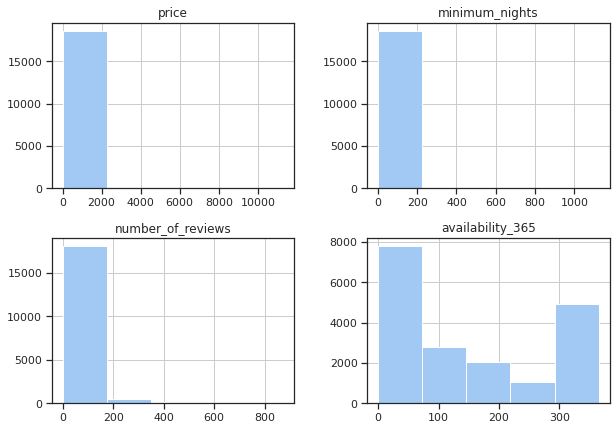

In [85]:
# plotar o histograma das variáveis numéricas
df.hist(column=['price',
                'minimum_nights',
                'number_of_reviews',
                'availability_365'], bins=5, figsize=(10,7));

É possível observar que as variáveis `price`, `mimimum_nigus` e `number_of_reviews` possuem outliets.

### **Removendo outliers e analisando as variáveis**

In [86]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18659.000000,18659.000000,18659.000000,13901.000000,18659.000000,18659.000000
mean,112.840988,4.614074,25.495954,0.866471,14.541562,144.779731
std,306.612591,22.625093,59.267084,1.312567,50.711719,144.887454
min,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,0.000000,0.100000,1.000000,0.000000
50%,73.000000,2.000000,4.000000,0.340000,1.000000,90.000000
75%,110.000000,3.000000,21.000000,1.030000,3.000000,314.000000
max,11304.000000,1124.000000,874.000000,11.950000,339.000000,365.000000


Essa representação gráfica  nos ajudará a compreender a técnica que usaremos nesta  para remoção de outliers. 


<img alt="Box-plot" width="70%" src="https://github.com/GiovanniSoares/Courses/raw/1217882791f7bac5cc9a9400cdee072719215ed4/4.%20Python%20Pandas%20Tratando%20e%20Analisando%20Dados/Instrutor/Curso%20Pandas/Box-Plot.png">

Box-plot, possui a seguinte configuração: temos uma mediana, em que dividimos os dados em 50%, para a direita e esquerda, igualmente. Teremos o Q1, que se refere ao primeiro quartil e parte em 25% e 75%, já o Q3 interquartílicoparte os dados em 75% e 25%. A diferença entre Q3 e Q1 gera o intervalo interquartílico, isto é, as estatísticas que geraremos para realizar o corte de outliers.

### **Removendo Outliers da variavel `price`**

In [108]:
price_outliers = df['price']

Q1 = price_outliers.quantile(.25)
Q3 = price_outliers.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


selecao = (price_outliers >= limite_inferior) & (price_outliers <= limite_superior)
df_clean = df[selecao]

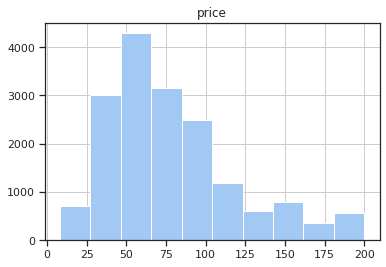

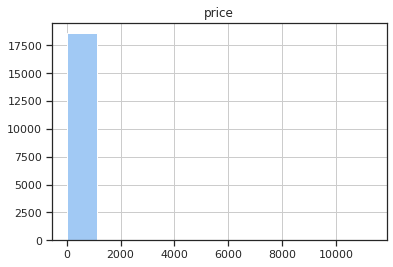

In [111]:
df_clean.hist(['price'])
df.hist(['price']);

Deste modo, conseguimos visualizar uma melhor distribução de frequencia dos dados.

Agora, utilziaremos o dataset sem a presença dos outliers de `price`, para analisar a distribuição por tipo de acomodação ou melhor, `room_type`.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


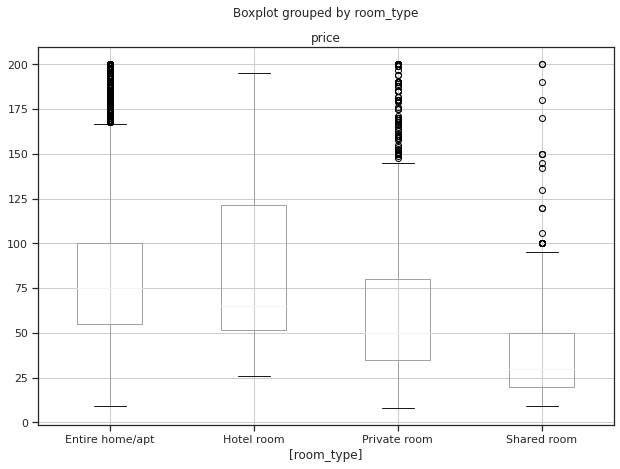

In [89]:
df_clean.boxplot(['price'], by = ['room_type'], figsize=(10,7), )
plt.show();

Conseguimos observar que:


*   `Entire home/apt` e `Private Room` possuem uma mediana quase igual, porem a distribuiçao em Private Room é maior.
*   `Private Room`, ainda existem diversos outliers para essa classe.
*   `Shared Room` possui em média os menores preços. (De fato, quem pagaria mais caro para alugueis com compartilhamento de quartos?)

Outro modo de verificar essas distribuições é com describe(), realizando o agrupamento da variável. O qual demonstra também a contagem de registros, demonstrando além da distribuição, que, Entire home/apt é o tipo de hospedagem mais adquirida pelos viajantes.


In [90]:
gruop_room = df_clean.groupby('room_type')
gruop_room[['price']].describe().round(1)

price                                            
                   count  mean   std   min   25%   50%    75%    max
room_type                                                           
Entire home/apt  12540.0  85.0  40.2   9.0  55.0  75.0  100.0  200.0
Hotel room          88.0  85.1  47.6  26.0  51.8  65.0  121.2  195.0
Private room      4245.0  62.1  38.4   8.0  35.0  50.0   80.0  200.0
Shared room        294.0  40.9  33.9   9.0  20.0  30.0   50.0  200.0

### **Outra dúvida levantada foi, qual tipo de acomodação possui mais locação?**

In [91]:
percent_room = pd.DataFrame(((df_clean.room_type.value_counts() / df_clean.shape[0])*100).round(2))
percent_room

,room_type
Entire home/apt,73.05
Private room,24.73
Shared room,1.71
Hotel room,0.51


Podemos observar que, `Entire home/apt` representa 3/4 de todas locações, seguido de `Private Room` com outra grande fatia, enquanto 
`Shared Room` e `Hotel Room` somados, não representam nem 3% do total.

### **A proxima abordagem, qual os bairros com maior volume de locação?**

In [92]:
df_clean['neighbourhood'].value_counts()[:5]

BUENOS AIRES - VENEZIA    1328
DUOMO                      850
NAVIGLI                    773
LORETO                     749
SARPI                      719
Name: neighbourhood, dtype: int64

### **Qual a distribuição de preços dos bairros com maior locação?**

In [93]:
selecao = ['BUENOS AIRES - VENEZIA', 'DUOMO' , 'NAVIGLI' , 'LORETO', 'SARPI'] 
selecao = df_clean['neighbourhood'].isin(selecao)
df_neighbourhood = df_clean[selecao]

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


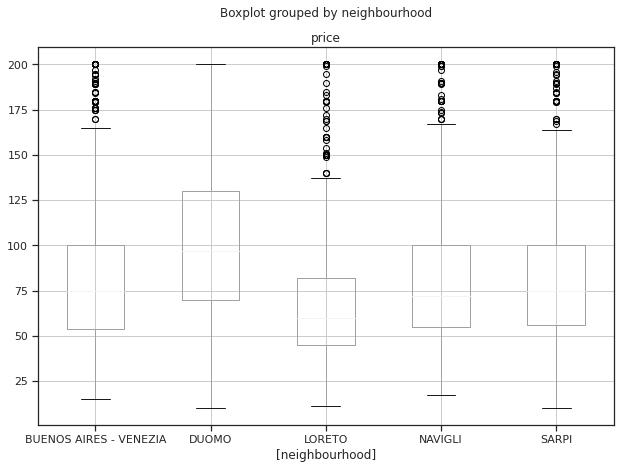

In [94]:
df_neighbourhood.boxplot(['price'], by = ['neighbourhood'], figsize=(10,7))


Podemos observar que, **Duomo** possui a maior média de valores, talves seja por conta da rande Cadetral de Milão que fica localizado nesta região; Ao oposto temos **Loreto** com menor média, porem com uma distribução maior. **Venezia, Navigli e Sarpi** possuem uma semelhança muito grande.

**Ambas regiões estão localizadas ao centro de Milão**

In [95]:
group_neighhourhood = df_neighbourhood.groupby('neighbourhood')
group_neighhourhood[['price']].describe().round(1)

price                                             
                         count   mean   std   min   25%   50%    75%    max
neighbourhood                                                              
BUENOS AIRES - VENEZIA  1328.0   82.6  40.4  15.0  54.0  75.0  100.0  200.0
DUOMO                    850.0  102.4  41.7  10.0  70.0  97.0  130.0  200.0
LORETO                   749.0   69.4  38.2  11.0  45.0  60.0   82.0  200.0
NAVIGLI                  773.0   82.3  39.7  17.0  55.0  72.0  100.0  200.0
SARPI                    719.0   84.0  40.2  10.0  56.0  75.0  100.0  200.0

A representatividade dessas alocações em relação a todo dataset


In [112]:
percent_neighhourhood = pd.DataFrame(((df_neighbourhood.neighbourhood.value_counts() / df_clean.shape[0])*100).round(2))
percent_neighhourhood

,neighbourhood
BUENOS AIRES - VENEZIA,7.74
DUOMO,4.95
NAVIGLI,4.50
LORETO,4.36
SARPI,4.19




---





# **Demais análises e visualizações**

Outros fatores que também podemos analisar são as correlações entre as variáveis.



## Correlação

Em probabilidade e estatística, correlação, dependência ou associação é qualquer relação estatística (causal ou não causal) entre duas variáveis e correlação é qualquer relação dentro de uma ampla classe de relações estatísticas que envolva dependência entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela.

<img alt="Box-plot" width="60%" src="https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/img2-2.png?w=1500">

Para identificar as correlações existentes entre as variáveis de interesse, podemos:
* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn`

In [97]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.031864,-0.118391,-0.149773,0.062065,0.019146
minimum_nights,-0.031864,1.000000,-0.027675,-0.036087,-0.008548,0.029322
number_of_reviews,-0.118391,-0.027675,1.000000,0.840623,-0.074332,0.041530
reviews_per_month,-0.149773,-0.036087,0.840623,1.000000,-0.049043,0.020656
calculated_host_listings_count,0.062065,-0.008548,-0.074332,-0.049043,1.000000,-0.020707
availability_365,0.019146,0.029322,0.041530,0.020656,-0.020707,1.000000


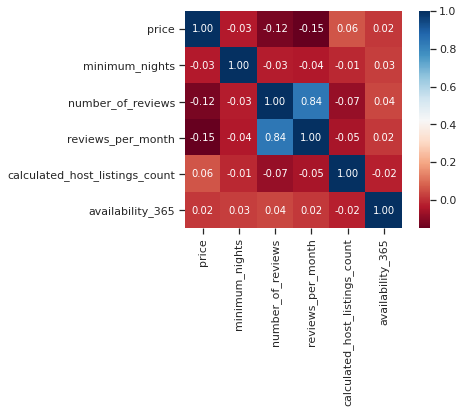

In [98]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## **Mapa de calor**

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

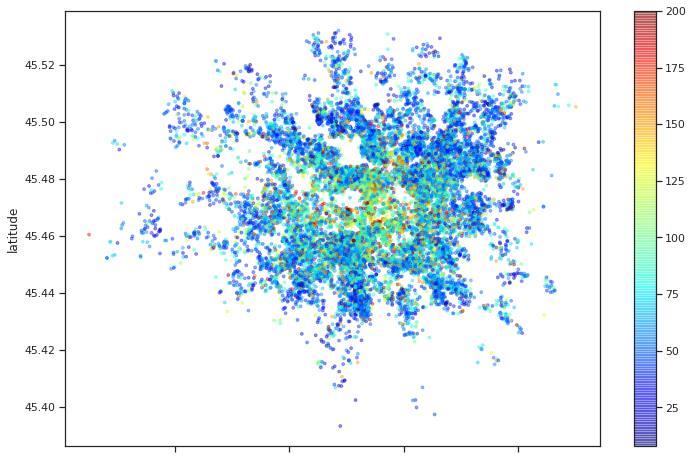

In [99]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

# **Considerações finais**

Realizei uma análise exploratoria basica em cima da base de dados do Airbnb da cidade de Milão na região da Lombardia, Italia, no qual nota-se que existem variaveis que estão completas de dados ausentes e outras com outliers. 

É possivel concluir que Casa / Apt inteiro é o tipo de hospedagem preferido dos viajantes ainda que em média os valores para hoteis são os mesmos, uma hipotese seria a proporção de anfitriões cadastrados sobre a quantidade de hoteis, talvez. Dos bairros mais alocados, também pudemos observar as distribuições e a representatividade, e de fato, todos eles estão localizados ao centro de Milão e proximo aos principais pontos turisticos.

Por fim, é importante lembrar que este dataset é uma versão resumida, sendo o ideal para uma abordagem inicial de análise. Ficando então como objetivo futuro, uma análise mais apurada do dataset completo.



